# Optimizing Travel Costs: A Data-Driven Approach to Flight Price Prediction using Regression Models.

# Data Driven Approach to Flight Prediction

Author: **Vighnesh Jha**

This notebook contains the implementation of flight price prediction using machine learning models. It includes data preprocessing, model training, evaluation, and visualization.

Date: 07-03-2024.


**Goal:
The objective of this project is to construct a robust regression model that can accurately forecast the price of a flight by considering various features such as airline, source city, destination city, class, duration, and days left until departure. Through the implementation of advanced algorithms including Linear Regression, Random Forest Regression, and Gradient Boosting Regression, the project aims to provide travelers with reliable predictions to optimize their travel costs and decision-making process.

Steps -- importing the dataset and Doing basic Eda Before Modelling.

In [26]:
import pandas as pd
df = pd.read_csv('/content/Clean_Dataset.csv')


In [27]:
print({column: df[column].dtype for column in df})

{'Unnamed: 0': dtype('int64'), 'airline': dtype('O'), 'flight': dtype('O'), 'source_city': dtype('O'), 'departure_time': dtype('O'), 'stops': dtype('O'), 'arrival_time': dtype('O'), 'destination_city': dtype('O'), 'class': dtype('O'), 'duration': dtype('float64'), 'days_left': dtype('int64'), 'price': dtype('int64')}


In [28]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [29]:
#dropping the index
df.drop('Unnamed: 0', axis=1, inplace=True)

In [63]:
#Doing basic EDA
#Summary Statistics:

# Define numerical column names
numerical_columns = ['duration', 'days_left', 'price']

# Define categorical column names
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class']


In [65]:
# Compute basic summary statistics
summary_statistics = df[numerical_columns].describe().round(2)
# Display summary statistics
print(summary_statistics)


        duration  days_left      price
count  300153.00  300153.00  300153.00
mean       12.22      26.00   20889.66
std         7.19      13.56   22697.77
min         0.83       1.00    1105.00
25%         6.83      15.00    4783.00
50%        11.25      26.00    7425.00
75%        16.17      38.00   42521.00
max        49.83      49.00  123071.00


duration Statistics:
Mean: 12.22
Median: 11.25
Standard Deviation: 7.19
Minimum Value: 0.83
Maximum Value: 49.83


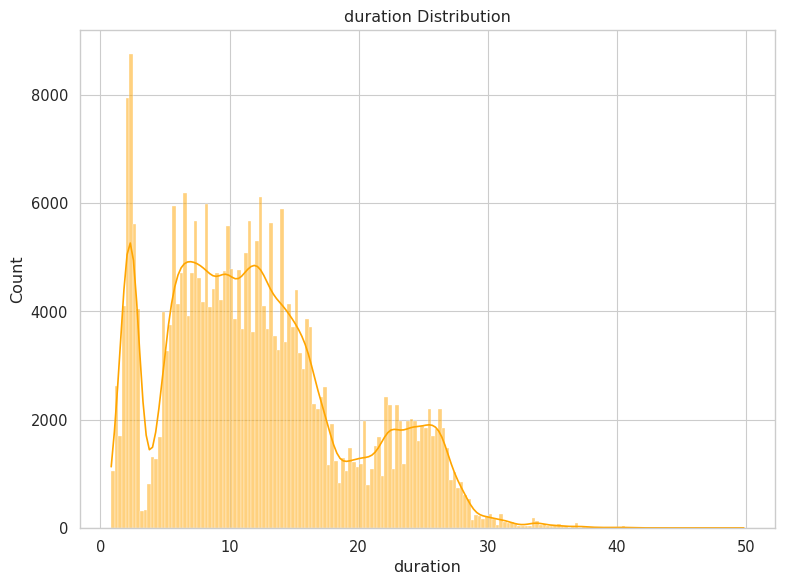

days_left Statistics:
Mean: 26.00
Median: 26.00
Standard Deviation: 13.56
Minimum Value: 1.00
Maximum Value: 49.00


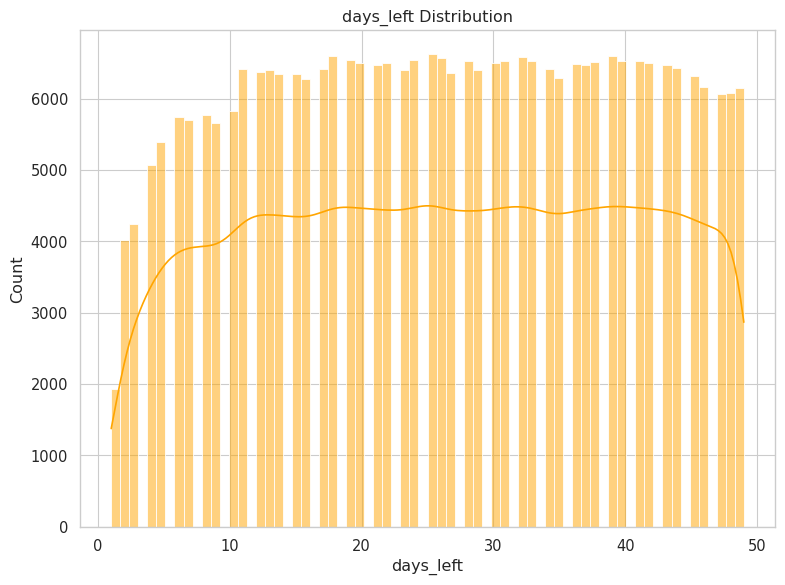

price Statistics:
Mean: 20889.66
Median: 7425.00
Standard Deviation: 22697.77
Minimum Value: 1105.00
Maximum Value: 123071.00


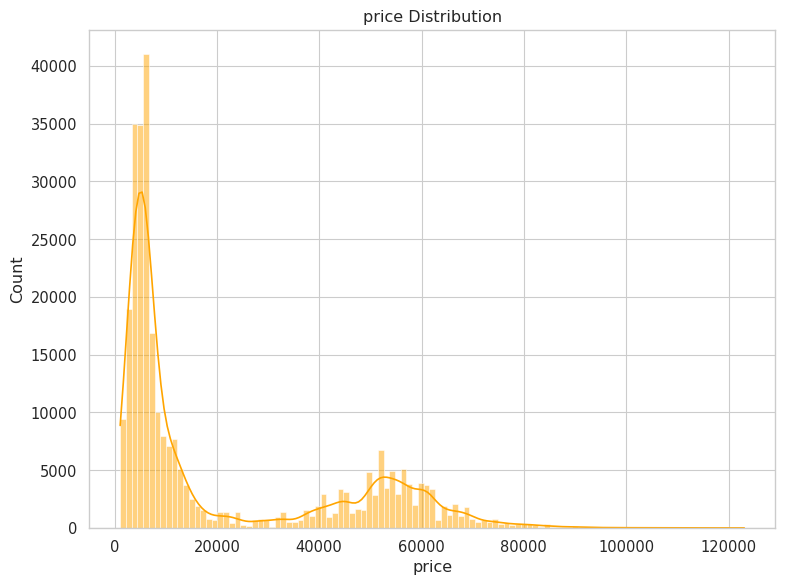

In [100]:
# Data Visualization:
## Histograms or density plots for numerical features:
import seaborn as sns

# Set the style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Plot histograms for numerical features
for col in numerical_columns:
    # Create a new figure for each histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'{col} Distribution')

    # Calculate statistics
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()

    # Display statistics as separate print lines
    print(f'{col} Statistics:')
    print(f'Mean: {mean:.2f}')
    print(f'Median: {median:.2f}')
    print(f'Standard Deviation: {std_dev:.2f}')
    print(f'Minimum Value: {min_val:.2f}')
    print(f'Maximum Value: {max_val:.2f}')

    # Show plot
    plt.tight_layout()
    plt.show()





duration vs Price:
Correlation: 0.20


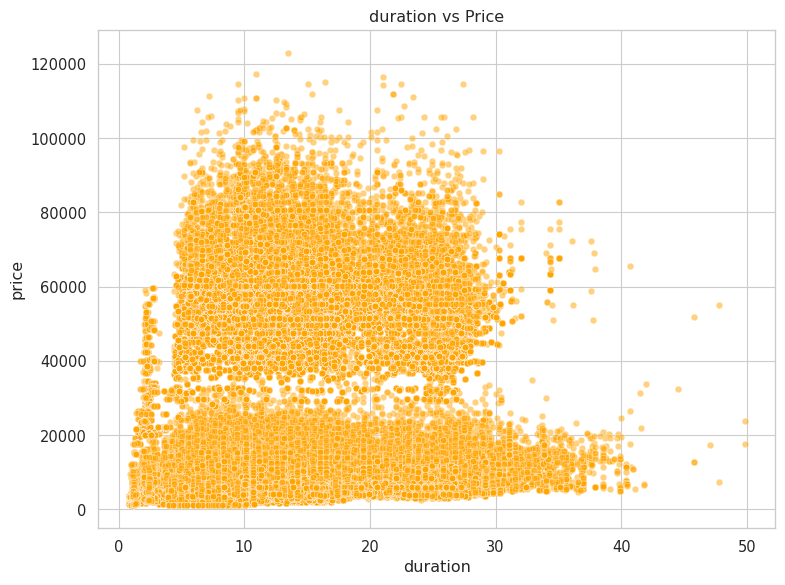

days_left vs Price:
Correlation: -0.09


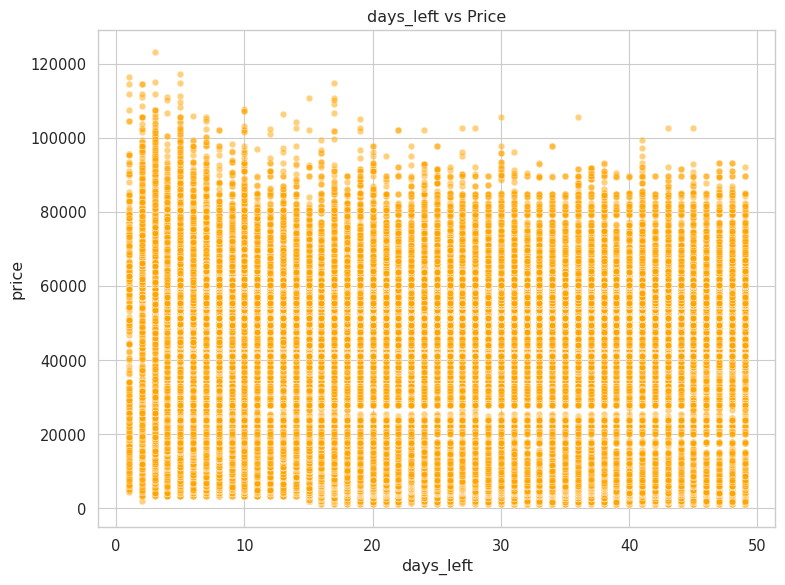

price vs Price:
Correlation: 1.00


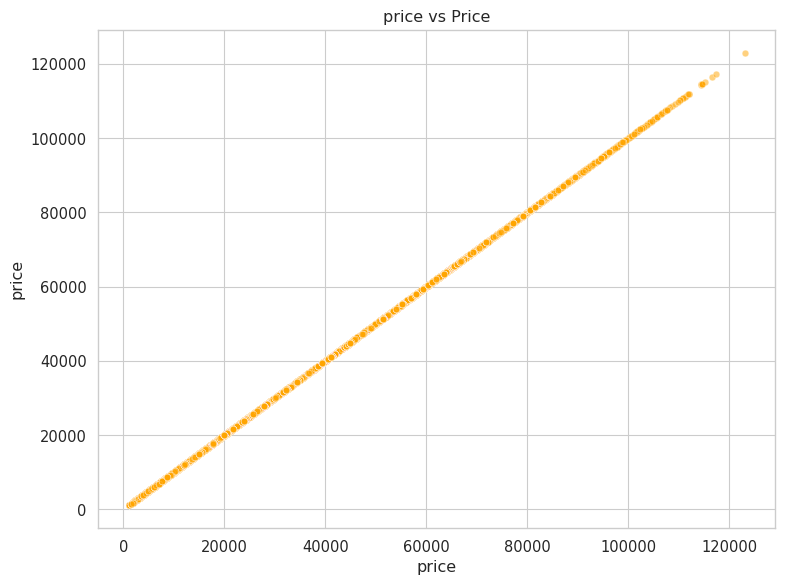

In [99]:
## Scatter plots for numerical features vs target variable (price):
import seaborn as sns

# Set the style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Plot scatter plots for numerical features vs target variable (price)
for col in numerical_columns:
    # Create a new figure for each scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['price'], color='orange', alpha=0.5)
    plt.title(f'{col} vs Price')

    # Calculate statistics
    correlation = df[[col, 'price']].corr().iloc[0, 1]

    # Display statistics as separate print lines
    print(f'{col} vs Price:')
    print(f'Correlation: {correlation:.2f}')

    # Show plot
    plt.tight_layout()
    plt.show()



airline Statistics:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


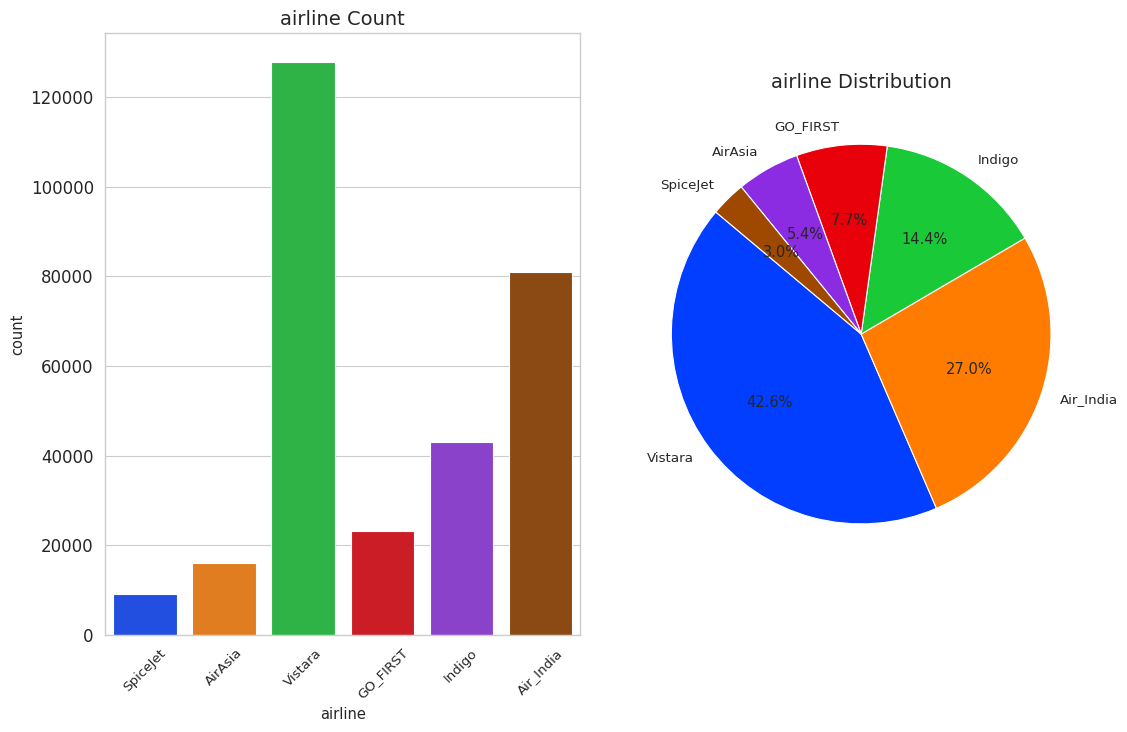

source_city Statistics:
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


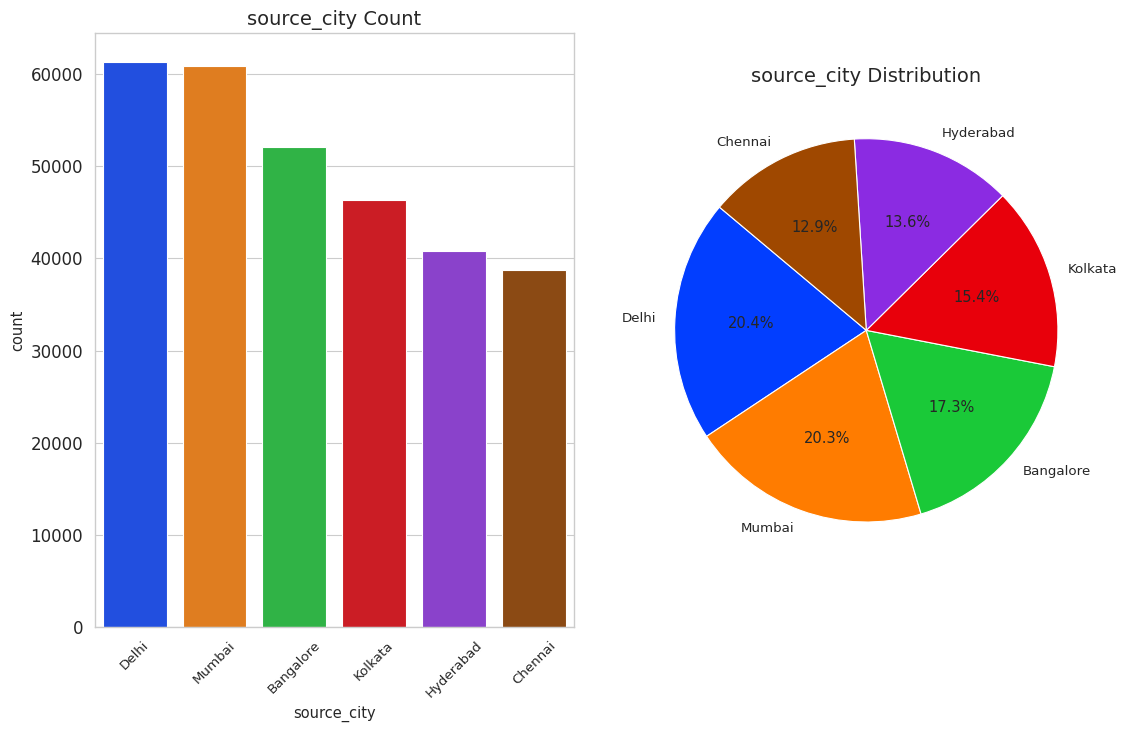

destination_city Statistics:
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


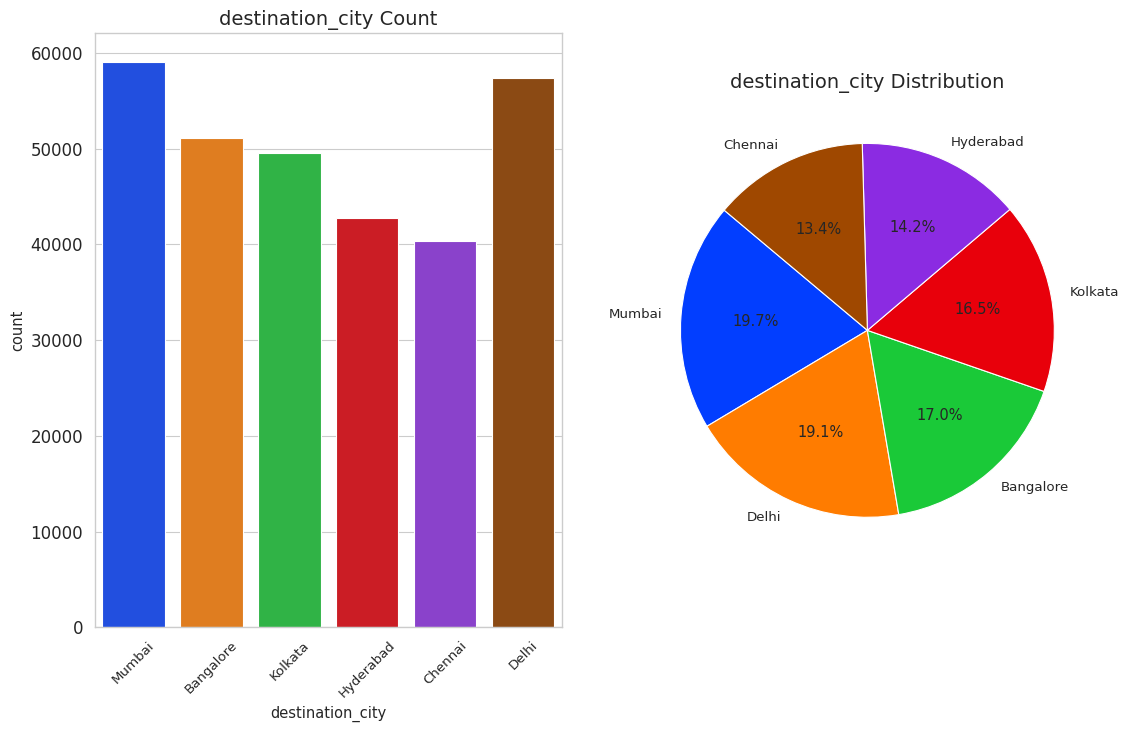

departure_time Statistics:
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


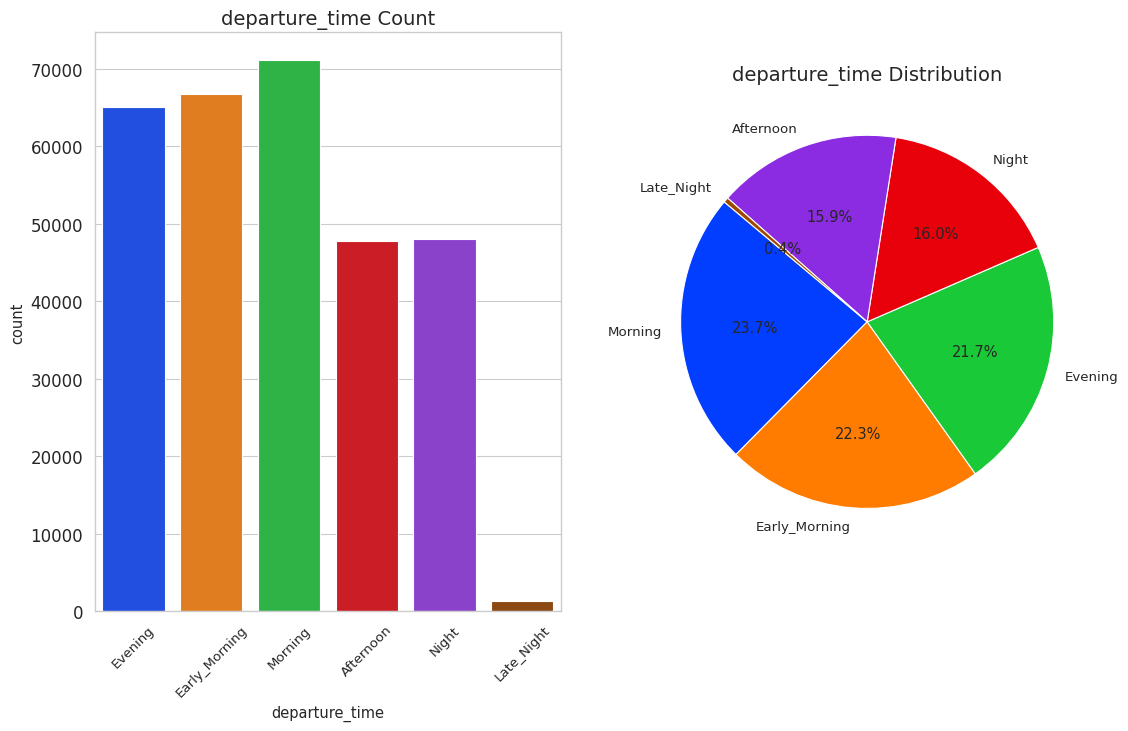

stops Statistics:
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


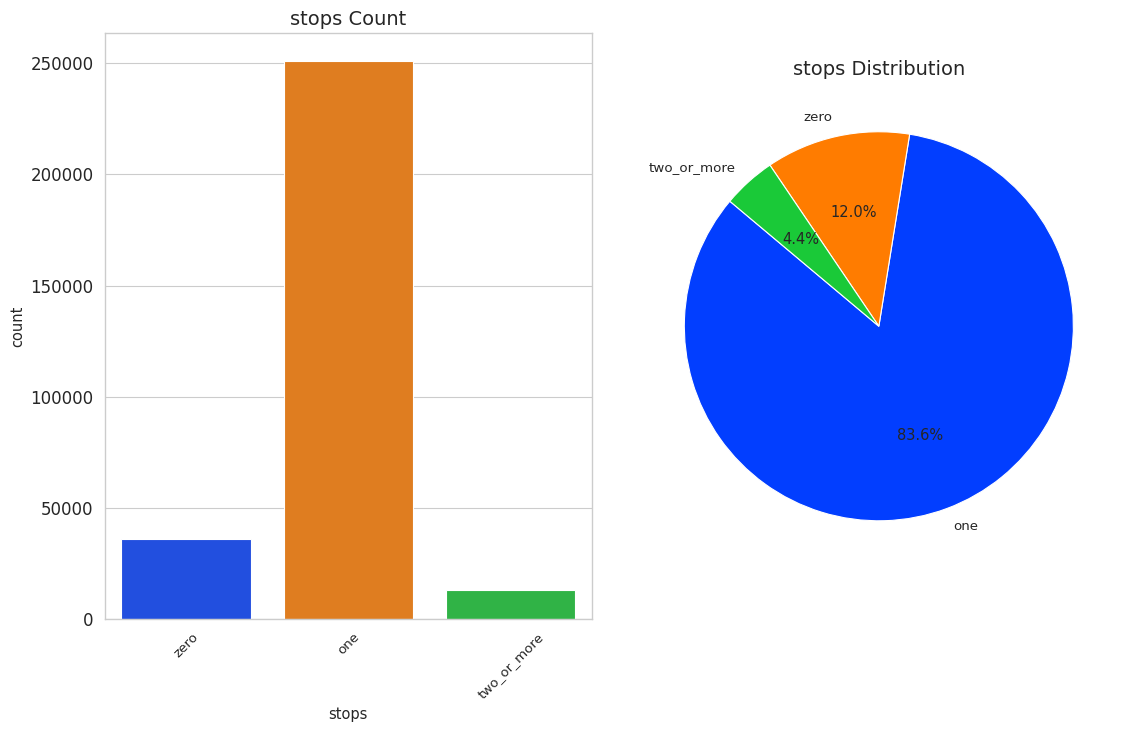

arrival_time Statistics:
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


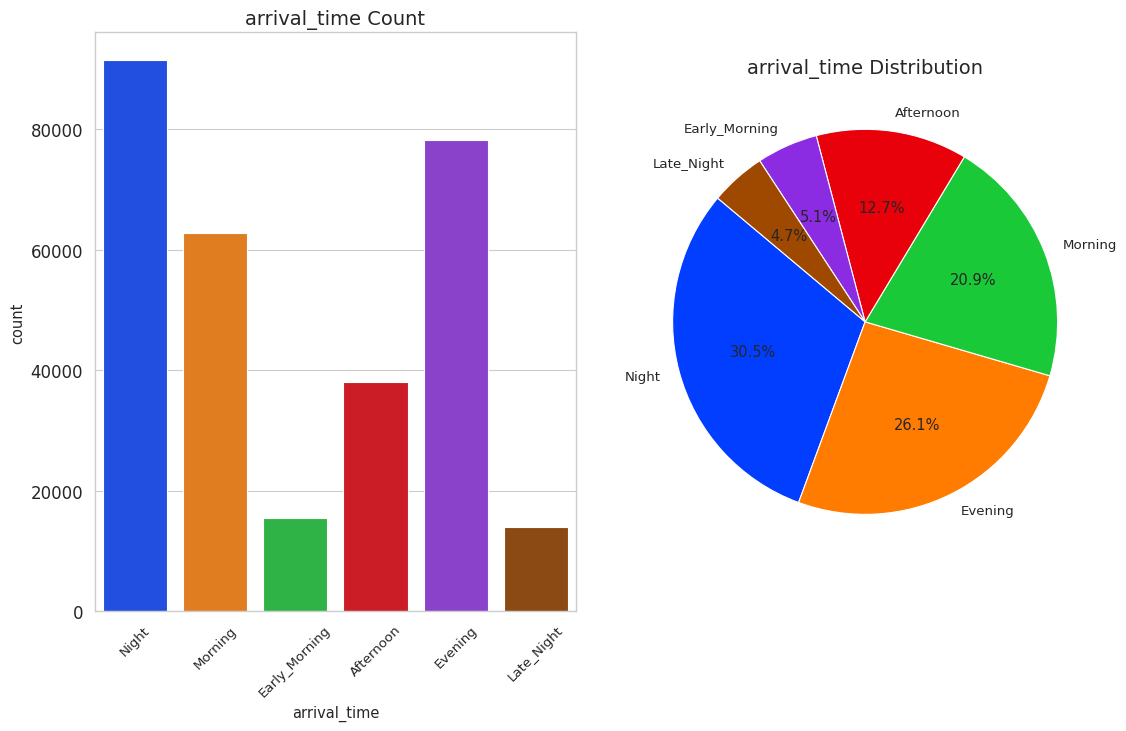

class Statistics:
Economy     206666
Business     93487
Name: class, dtype: int64




<ipython-input-83-fe704b4a55bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


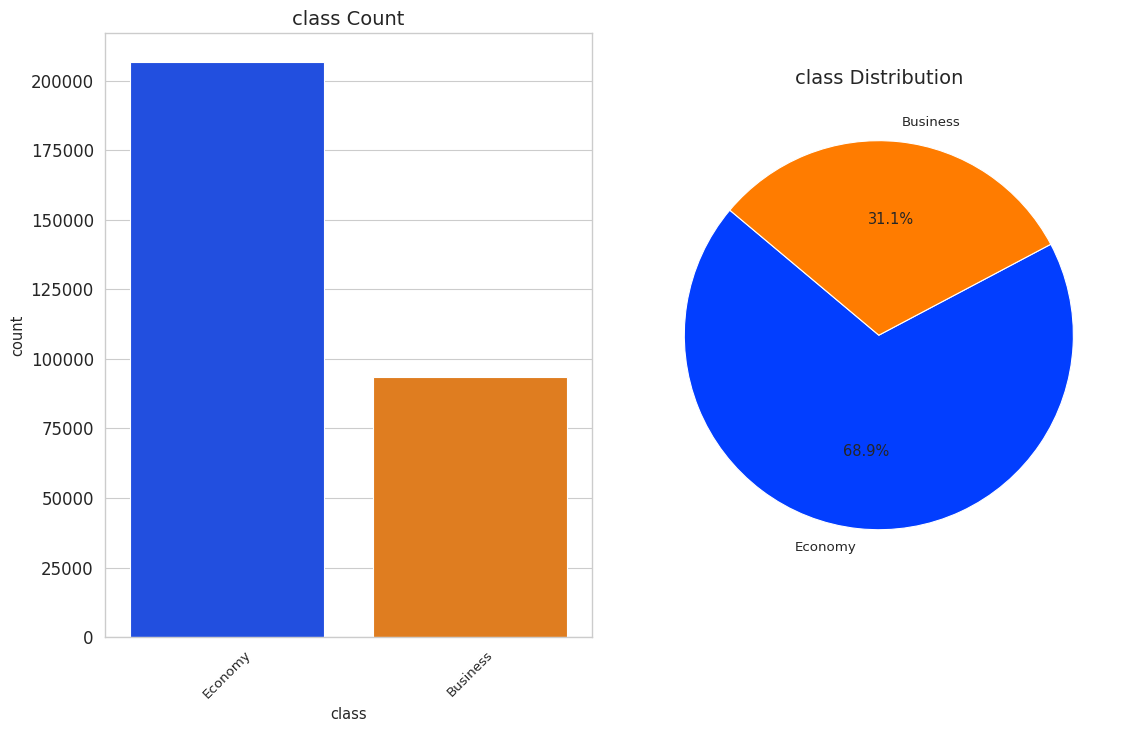

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context with modified font size
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.1)

# Plot bar plots and pie charts for categorical columns
for col in categorical_columns:
    # Calculate statistics
    col_counts = df[col].value_counts()
    print(f'{col} Statistics:')
    print(col_counts)
    print('\n')

    # Create a new figure for each plot
    plt.figure(figsize=(12, 8))

    # Bar Plot with vibrant colors and decreased font size
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, palette='bright')
    plt.title(f'{col} Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=12)

    # Pie Chart with vibrant colors and decreased font size
    plt.subplot(1, 2, 2)
    col_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('bright'), startangle=140)
    plt.title(f'{col} Distribution', fontsize=14)
    plt.ylabel('')  # Remove y-label
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout with increased spacing between charts
    plt.tight_layout(pad=3.0)

    # Show plot
    plt.show()


In [ ]:
## Initial Findings Description:-

Based on the data provided:

**Vistara emerges as the top choice among travelers,** capturing a significant market share with the **highest number of flight bookings**. These flights primarily originate from major cities such as **Delhi, Mumbai, and Bangalore**, indicating a strong presence in key metropolitan areas.


**Morning departures are preferred** by passengers, as they align with the desire for convenient travel times and efficient utilization of daytime hours. **One-stop flights are the most popular choice**, offering a balance between travel convenience and connectivity. Additionally, **arrival times predominantly occur in the evening or at night**, indicating a trend towards schedules accommodating evening arrivals, possibly for business meetings, leisure activities, or connecting flights. Overall, these preferences reflect a desire for efficient and **flexible travel options that cater to various needs and schedules.**






**Economy class bookings dominate** the dataset, indicating a preference for cost-effective travel options among travelers. This preference for economy class may reflect budget considerations or a **greater availability of economy class seats**.

In [ ]:
#Proceeding to Making Model-

In [30]:
#Splitting the df into numerical and categorical cols for better analysis.
numerical_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [31]:
numerical_df.columns

Index(['duration', 'days_left', 'price'], dtype='object')

**Handling Missing Values for the numerical df column and Feature Scaling using minMaxScaler.**

In [32]:
from sklearn.impute import SimpleImputer

# Define the imputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the numerical data
imputer.fit(numerical_df[['duration', 'days_left', 'price']])

# Transform the numerical data by replacing missing values with the strategy
numerical_df[['duration', 'days_left', 'price']] = imputer.transform(numerical_df[['duration', 'days_left', 'price']])


In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'numerical_df' is your original DataFrame
# Define the numerical features
numerical_features = ['duration', 'days_left', 'price']

# Create a scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
numerical_df_scaled = scaler.fit_transform(numerical_df[numerical_features])

# Convert the scaled array back to a DataFrame
numerical_df_scaled = pd.DataFrame(numerical_df_scaled, columns=numerical_features)


In [34]:
numerical_df_scaled

,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765
...,...,...,...
300148,0.188776,1.0,0.558844
300149,0.195714,1.0,0.623124
300150,0.265306,1.0,0.639473
300151,0.187143,1.0,0.659856


In [36]:
# Checking the missing values in each column

missing_values_dict = {}
for column in numerical_df_scaled.columns:
  missing_values_count = numerical_df_scaled[column].isnull().sum()
  missing_values_dict[column] = missing_values_count

print(missing_values_dict)


{'duration': 0, 'days_left': 0, 'price': 0}


**Handling Missing Values for the Categorical df column and Feature Scaling using minMaxScaler.**

In [38]:
categorical_df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [34]:
## Deciding which columns to drop

In [43]:
categorical_df.drop(columns=['flight', 'departure_time', 'arrival_time'], inplace=True)


In [44]:
categorical_df

,airline,source_city,stops,destination_city,class
0,SpiceJet,Delhi,zero,Mumbai,Economy
1,SpiceJet,Delhi,zero,Mumbai,Economy
2,AirAsia,Delhi,zero,Mumbai,Economy
3,Vistara,Delhi,zero,Mumbai,Economy
4,Vistara,Delhi,zero,Mumbai,Economy
...,...,...,...,...,...
300148,Vistara,Chennai,one,Hyderabad,Business
300149,Vistara,Chennai,one,Hyderabad,Business
300150,Vistara,Chennai,one,Hyderabad,Business
300151,Vistara,Chennai,one,Hyderabad,Business


In [34]:
## checking how many unique values are present in each column


In [45]:
unique_values_dict = {}
for column in categorical_df:
  unique_values_count = categorical_df[column].nunique()
  unique_values_dict[column] = unique_values_count

print(unique_values_dict)


{'airline': 6, 'source_city': 6, 'stops': 3, 'destination_city': 6, 'class': 2}


In [ ]:
#Performing Encoding on the categorical vairbales

In [46]:
import pandas as pd
columns_to_encode = ['airline', 'destination_city', 'source_city', 'stops']

# Perform one-hot encoding
categorical_df_encoded = pd.get_dummies(categorical_df, columns=columns_to_encode)


     class  airline_AirAsia  airline_Air_India  airline_GO_FIRST  \
0  Economy                0                  0                 0   
1  Economy                0                  0                 0   
2  Economy                1                  0                 0   
3  Economy                0                  0                 0   
4  Economy                0                  0                 0   

   airline_Indigo  airline_SpiceJet  airline_Vistara  \
0               0                 1                0   
1               0                 1                0   
2               0                 0                0   
3               0                 0                1   
4               0                 0                1   

   destination_city_Bangalore  destination_city_Chennai  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                 

In [49]:
# Define the label encoder for the 'class' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'class' column
categorical_df_encoded['class_encoded'] = label_encoder.fit_transform(categorical_df['class'])

# Drop the original 'class' column
categorical_df_encoded.drop(columns=['class'], inplace=True)

# Display the encoded DataFrame
print(categorical_df_encoded.head())

   airline_AirAsia  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0                0                  0                 0               0   
1                0                  0                 0               0   
2                1                  0                 0               0   
3                0                  0                 0               0   
4                0                  0                 0               0   

   airline_SpiceJet  airline_Vistara  destination_city_Bangalore  \
0                 1                0                           0   
1                 1                0                           0   
2                 0                0                           0   
3                 0                1                           0   
4                 0                1                           0   

   destination_city_Chennai  destination_city_Delhi  \
0                         0                       0   
1                         0   

In [50]:
categorical_df_encoded

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,...,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,class_encoded
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
300149,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
300150,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
300151,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
#Combining the data after PreProcessing.

In [51]:
import pandas as pd
df_combined = pd.concat([numerical_df_scaled, categorical_df_encoded], axis=1)
df_combined



,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,...,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,class_encoded
0,0.027347,0.0,0.039749,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
1,0.030612,0.0,0.039749,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0.027347,0.0,0.039773,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0.028980,0.0,0.039765,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
4,0.030612,0.0,0.039765,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.188776,1.0,0.558844,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
300149,0.195714,1.0,0.623124,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
300150,0.265306,1.0,0.639473,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
300151,0.187143,1.0,0.659856,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [52]:
#checking null values in the final df

missing_values_dict = {}
for column in df_combined.columns:
  missing_values_count = df_combined[column].isnull().sum()
  missing_values_dict[column] = missing_values_count

print(missing_values_dict)


{'duration': 0, 'days_left': 0, 'price': 0, 'airline_AirAsia': 0, 'airline_Air_India': 0, 'airline_GO_FIRST': 0, 'airline_Indigo': 0, 'airline_SpiceJet': 0, 'airline_Vistara': 0, 'destination_city_Bangalore': 0, 'destination_city_Chennai': 0, 'destination_city_Delhi': 0, 'destination_city_Hyderabad': 0, 'destination_city_Kolkata': 0, 'destination_city_Mumbai': 0, 'source_city_Bangalore': 0, 'source_city_Chennai': 0, 'source_city_Delhi': 0, 'source_city_Hyderabad': 0, 'source_city_Kolkata': 0, 'source_city_Mumbai': 0, 'stops_one': 0, 'stops_two_or_more': 0, 'stops_zero': 0, 'class_encoded': 0}


In [ ]:
## PreProcessing Complete , creating a working copy for saftey purposes.

In [55]:
df_main =df_combined.copy()

Train -Test Split.

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define feature variables (X) and target variable (y)
X = df_main.drop('price', axis=1)  # Features: all columns except 'price'
y = df_main['price']  # Target variable: 'price'

# Perform train-test split with 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (240122, 24)
Shape of X_test: (60031, 24)
Shape of y_train: (240122,)
Shape of y_test: (60031,)


In [89]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round the evaluation metrics to two decimal places
mse_rounded = round(mse, 2)
mae_rounded = round(mae, 2)
r2_rounded = round(r2, 2)

# Print the rounded evaluation metrics
print("Mean Squared Error (MSE):", mse_rounded)
print("Mean Absolute Error (MAE):", mae_rounded)
print("R-squared Score (R2):", r2_rounded)


Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.04
R-squared Score (R2): 0.91


In [ ]:
#Initial results are really good , Fine tuning the model.

In [92]:
#Ridge Regression:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define and train the Ridge Regression model
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)

# Predict the prices for the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics for Ridge Regression
print("Ridge Regression:")
print("Mean Squared Error (MSE):", mse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print("R-squared Score (R2):", r2_ridge)

# Round the evaluation metrics for Ridge Regression to two decimal places
mse_ridge_rounded = round(mse_ridge, 2)
mae_ridge_rounded = round(mae_ridge, 2)
r2_ridge_rounded = round(r2_ridge, 2)

# Print the rounded evaluation metrics for Ridge Regression
print("Ridge Regression:")
print("Mean Squared Error (MSE):", mse_ridge_rounded)
print("Mean Absolute Error (MAE):", mae_ridge_rounded)
print("R-squared Score (R2):", r2_ridge_rounded)



Ridge Regression:
Mean Squared Error (MSE): 0.0030939770945792888
Mean Absolute Error (MAE): 0.03739900202852737
R-squared Score (R2): 0.9107145029455029
Ridge Regression:
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.04
R-squared Score (R2): 0.91


From the comparison, we observe that the performance metrics of Ridge Regression are almost identical to the original Linear Regression. The MSE, MAE, and R-squared Score remain the same, rounded to two decimal places.

**Therefore, in this particular case, Ridge Regression did not lead to significant improvement over the original Linear Regression model. **

In [93]:
# Polynomial Regression:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of polynomial features
degree = 2  # You can change this as needed

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Linear Regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict the prices for the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print the evaluation metrics for Polynomial Regression
print("\nPolynomial Regression (Degree={}):".format(degree))
print("Mean Squared Error (MSE):", mse_poly)
print("Mean Absolute Error (MAE):", mae_poly)
print("R-squared Score (R2):", r2_poly)

# Round the evaluation metrics for Polynomial Regression to two decimal places
mse_poly_rounded = round(mse_poly, 2)
mae_poly_rounded = round(mae_poly, 2)
r2_poly_rounded = round(r2_poly, 2)

# Print the rounded evaluation metrics for Polynomial Regression
print("\nPolynomial Regression (Degree={}):".format(degree))
print("Mean Squared Error (MSE):", mse_poly_rounded)
print("Mean Absolute Error (MAE):", mae_poly_rounded)
print("R-squared Score (R2):", r2_poly_rounded)



Polynomial Regression (Degree=2):
Mean Squared Error (MSE): 0.001830166094476363
Mean Absolute Error (MAE): 0.02667639243625791
R-squared Score (R2): 0.947185359024182

Polynomial Regression (Degree=2):
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.03
R-squared Score (R2): 0.95


From the comparison, we can observe that Polynomial Regression with degree 2 outperforms both the original Linear Regression and Ridge Regression models:

It achieves a lower Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating better accuracy in predicting flight prices.
**The R-squared Score (R2) is higher for Polynomial Regression, indicating that a larger proportion of the variance in flight prices is explained by the model.**

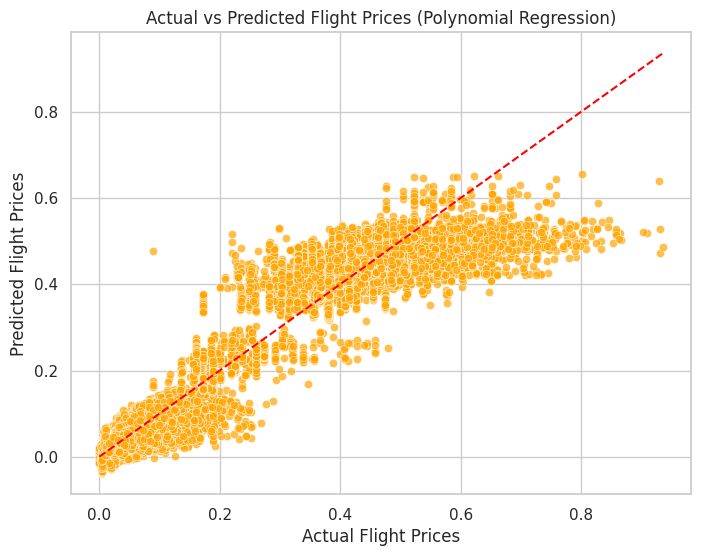

In [98]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot of actual vs predicted flight prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='orange', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title("Actual vs Predicted Flight Prices (Polynomial Regression)")
plt.xlabel("Actual Flight Prices")
plt.ylabel("Predicted Flight Prices")
plt.grid(True)
plt.show()


My analysis highlights the **superiority of Polynomial Regression (degree 2)** over Linear Regression and Ridge Regression models. Polynomial Regression demonstrates lower MSE and MAE, indicating improved precision in predicting flight prices, along with a higher R-squared Score (R2), showcasing its **robust capability in capturing price patterns and variance. **By utilizing Polynomial Regression (degree 2), we gain a predictive framework that surpasses previous models, providing deep insights into flight price dynamics for informed decision-making and ***enhanced efficiency in air travel.Driven by insights from Data. ***





In [102]:
import watermark

# Add watermark
%load_ext watermark

# Specify the watermark parameters
%watermark -a "Vighnesh Jha" -d -v -m -p watermark


Author: Vighnesh Jha

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

watermark: 2.4.3

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

